In [33]:
import pandas as pd
import numpy as np

import pickle
import os
import matplotlib.pyplot as plt

In [12]:
PROJECT_FOLDER = "../.."
INPUT_DATA_FOLDER = "data/final_data"
MODEL_FOLDER = "model"
FINAL_TRAIN_MATRIX = "final_train_matrix_v1.pkl"
FINAL_DATETIMES = "final_datetimes_v1"
FINAL_Y = "final_y_v1"
TUNING_FOLDER = f"{PROJECT_FOLDER}/{MODEL_FOLDER}/tuning"

In [3]:
y = pickle.load(open(f"{PROJECT_FOLDER}/{INPUT_DATA_FOLDER}/{FINAL_Y}.pkl", "rb"))

In [6]:
X = pickle.load(open(f"{PROJECT_FOLDER}/{INPUT_DATA_FOLDER}/{FINAL_TRAIN_MATRIX}", "rb"))

In [46]:
model_names = []
model_scores = []
models = []

In [47]:
for i in range(8, 12):
    folder_name = f"{TUNING_FOLDER}/logistic_regression_v{i}"
    for file_name in os.listdir(folder_name):
        with open(os.path.join(folder_name, file_name), "rb") as f:
            model = pickle.load(f)
            models.append(model)
            score = model.score(X[150000:], y[150000:])
            model_names.append(f"{file_name}")
            model_scores.append(score)


In [48]:
#model_names

In [49]:
#type(model_scores)

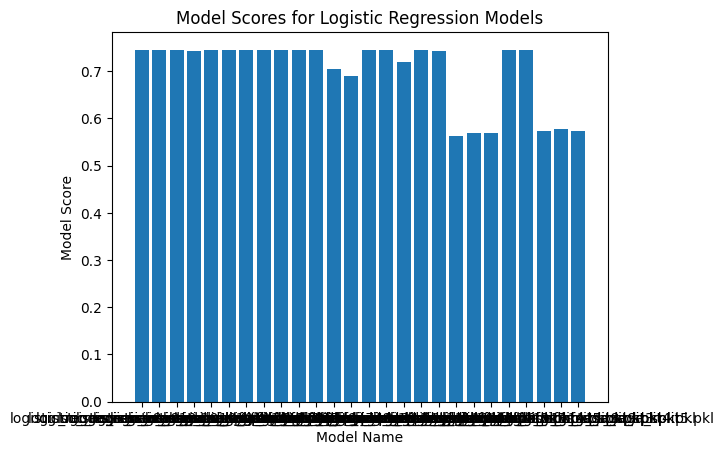

In [19]:
plt.bar(model_names, model_scores)
plt.xlabel("Model Name")
plt.ylabel("Model Score")
plt.title("Model Scores for Logistic Regression Models")
plt.show()


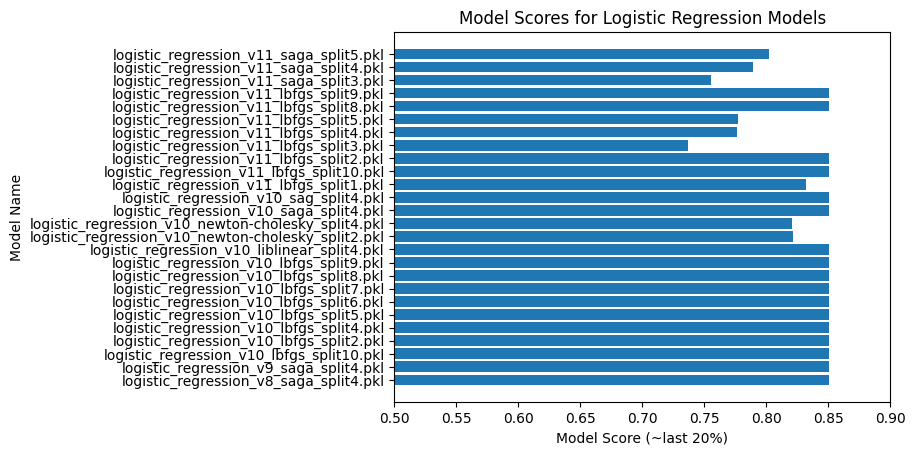

In [55]:
plt.clf()
#y_pos=np.arange(len(model_names))
plt.barh(model_names, model_scores)
plt.ylim()
plt.xlim([0.5, 0.9])
plt.ylabel("Model Name")
plt.xlabel("Model Score (~last 20%)")
plt.title("Model Scores for Logistic Regression Models")
plt.show()


In [51]:
model_scores_full = []

In [52]:
for model in models:
    model_scores_full.append(model.score(X, y))

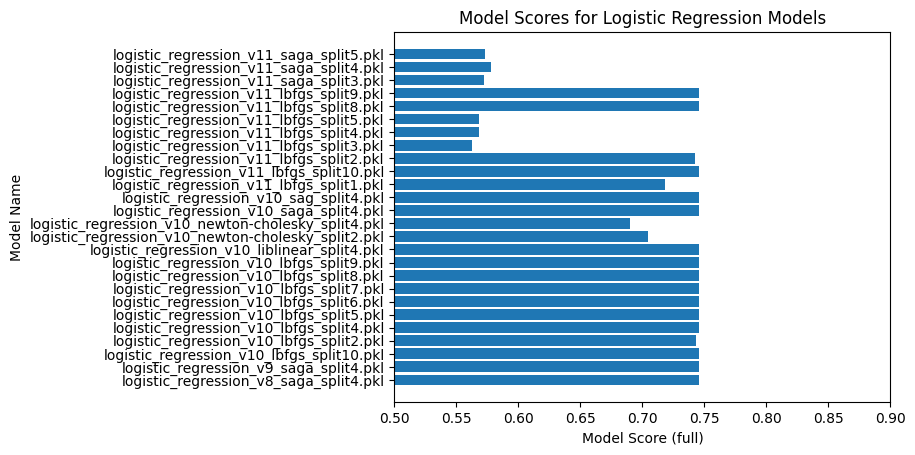

In [56]:

plt.clf()
plt.barh(model_names, model_scores_full)
plt.ylim()
plt.xlim([0.5, 0.9])
plt.ylabel("Model Name")
plt.xlabel("Model Score (full)")
plt.title("Model Scores for Logistic Regression Models")
plt.show()

In [65]:
class_weight_list = []

for model in models:
    class_weight = model.class_weight
    class_weight_list.append(f"{class_weight}")


In [67]:
class_weight_list

['None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'balanced',
 'balanced',
 'balanced',
 'None',
 'None',
 'balanced',
 'balanced',
 'balanced']

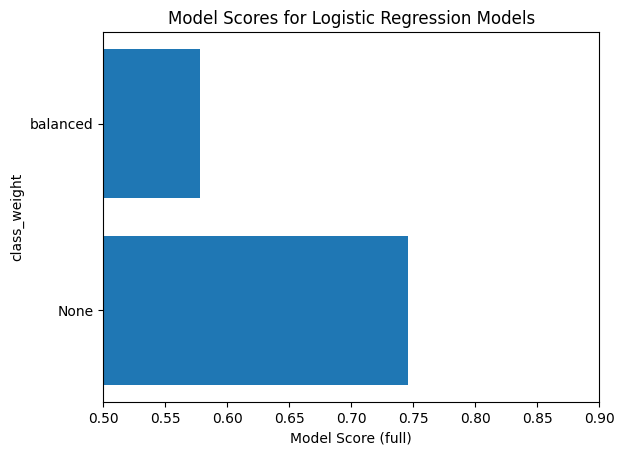

In [66]:
plt.clf()
plt.barh(class_weight_list, model_scores_full)
plt.ylim()
plt.xlim([0.5, 0.9])
plt.ylabel("class_weight")
plt.xlabel("Model Score (full)")
plt.title("Model Scores for Logistic Regression Models")
plt.show()

In [68]:
type(y)

pandas.core.series.Series

In [72]:
y_split = np.array_split(y, 10)
sums = [part.sum() for part in y_split]

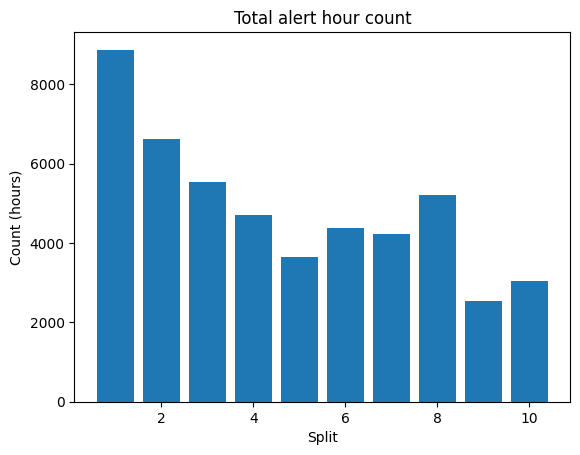

In [74]:
y_split = np.array_split(y, 5)
sums = [part.sum() for part in y_split]

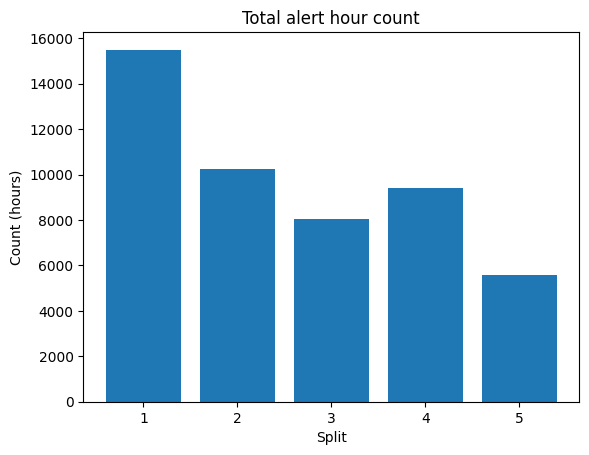

In [75]:
plt.bar(range(1, 6), sums)
plt.xlabel("Split")
plt.ylabel("Count (hours)")
plt.title("Total alert hour count")
plt.show()

In [76]:
predictions = []
for model in models:
    predictions.append(model.predict(X))

In [77]:
true_positive = []
false_positive = []
false_negative = []
true_negative = []

for model in models:
    y_pred = model.predict(X)
    tp = 0
    fp = 0
    fn = 0
    tn = 0
    for i in range(len(y)):
        if y[i] == 1 and y_pred[i] == 1:
            tp += 1
        elif y[i] == 0 and y_pred[i] == 1:
            fp += 1
        elif y[i] == 1 and y_pred[i] == 0:
            fn += 1
        elif y[i] == 0 and y_pred[i] == 0:
            tn += 1
    true_positive.append(tp)
    false_positive.append(fp)
    false_negative.append(fn)
    true_negative.append(tn)

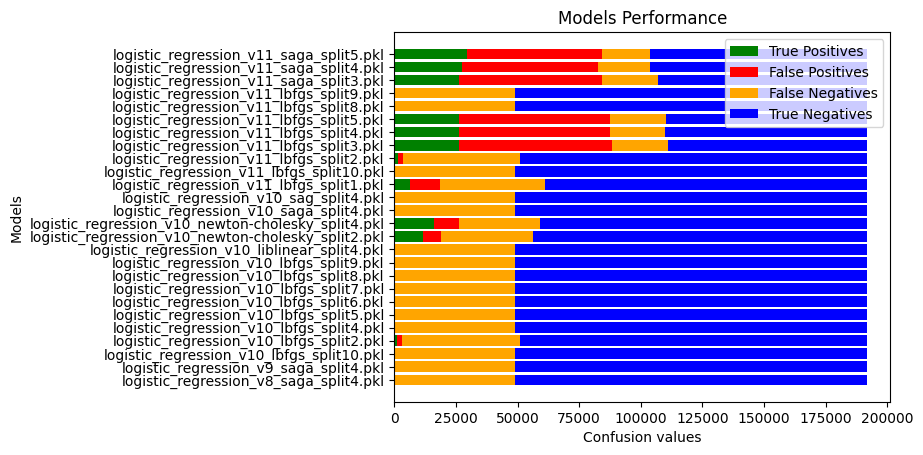

In [81]:
fig, ax = plt.subplots()
ax.barh(model_names, true_positive, label='True Positives', color='green')
ax.barh(model_names, false_positive, left=true_positive, label='False Positives', color='red')
ax.barh(model_names, false_negative, left=np.array(true_positive) + np.array(false_positive), label='False Negatives', color='orange')
ax.barh(model_names, true_negative, left=np.array(true_positive) + np.array(false_positive) + np.array(false_negative), label='True Negatives', color='blue')

# set axis labels and title
ax.set_xlabel('Confusion values')
ax.set_ylabel('Models')
ax.set_title('Models Performance')

# add legend
ax.legend()

# display plot
plt.show()